In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [4]:
df = pd.read_csv('homework_ab_app_subscription_small.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   period                    1000 non-null   object 
 1   cohort_date               1000 non-null   object 
 2   variant                   505 non-null    object 
 3   user_id                   1000 non-null   object 
 4   country                   1000 non-null   object 
 5   platform                  1000 non-null   object 
 6   traffic_source            1000 non-null   object 
 7   device_model              1000 non-null   object 
 8   age                       1000 non-null   int64  
 9   sessions_7d               1000 non-null   int64  
 10  time_to_first_action_min  1000 non-null   float64
 11  trial_start               1000 non-null   int64  
 12  paid_subscriber           1000 non-null   int64  
 13  revenue_30d               1000 non-null   float64
dtypes: float6

In [5]:
df.head()

,period,cohort_date,variant,user_id,country,platform,traffic_source,device_model,age,sessions_7d,time_to_first_action_min,trial_start,paid_subscriber,revenue_30d
0,during,2025-07-05,B,APP201334,ID,android,organic,low_end,54,4,6.1,0,0,400.0
1,before,2025-06-28,NaN,APP100371,ID,ios,social,flagship,38,5,6.6,0,0,200.0
2,before,2025-06-30,NaN,APP105351,IN,android,social,flagship,45,6,9.7,0,0,300.0
3,before,2025-06-20,NaN,APP103745,ID,android,organic,mid_range,52,5,3.2,0,0,500.0
4,during,2025-07-04,A,APP201596,ID,android,organic,low_end,24,2,6.5,0,0,500.0


### Data Preparation

In [6]:
# Memfilter data untuk hanya menyertakan periode eksperimen ('during')
# df_experiment = df[df['period'] == 'during'].copy()
df_experiment = df.copy()
df_a = df_experiment[df_experiment['variant'] == 'A'].copy()
df_b = df_experiment[df_experiment['variant'] == 'B'].copy()

print(f"\nJumlah user di Varian A: {len(df_a)}")
print(f"Jumlah user di Varian B: {len(df_b)}")


Jumlah user di Varian A: 257
Jumlah user di Varian B: 248


In [7]:
df_a.describe()

,age,sessions_7d,time_to_first_action_min,trial_start,paid_subscriber,revenue_30d
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,35.424125,5.303502,5.847471,0.178988,0.031128,3239.299611
std,10.623303,2.376913,4.049615,0.384091,0.174004,19166.001094
min,17.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,27.000000,4.000000,2.800000,0.000000,0.000000,100.000000
50%,35.000000,5.000000,5.200000,0.000000,0.000000,200.000000
75%,45.000000,7.000000,7.900000,0.000000,0.000000,400.000000
max,54.000000,14.000000,29.000000,1.000000,1.000000,210900.000000


In [8]:
df_b.describe()

,age,sessions_7d,time_to_first_action_min,trial_start,paid_subscriber,revenue_30d
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,35.322581,5.153226,5.451210,0.169355,0.024194,2638.709677
std,11.246267,2.482471,3.884746,0.375824,0.153960,16309.562083
min,17.000000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,25.000000,3.000000,2.500000,0.000000,0.000000,100.000000
50%,36.500000,5.000000,4.700000,0.000000,0.000000,300.000000
75%,45.000000,7.000000,7.050000,0.000000,0.000000,400.000000
max,54.000000,13.000000,21.400000,1.000000,1.000000,176300.000000


### Cek Normality

In [9]:
shapiro_A = stats.shapiro(df_a['revenue_30d'])
shapiro_B = stats.shapiro(df_b['revenue_30d'])

print("jika salah satu varian memiliki p-value < 0.05 maka bisa disimpulkan tidak terdistribusi normal, maka Cek Variansi akan diabaikan\n")

print("Shapiro-Wilk test for Variant A: p-value={:.50f}".format(shapiro_A.pvalue))
print("Shapiro-Wilk test for Variant B: p-value={:.50f}".format(shapiro_B.pvalue))

jika salah satu varian memiliki p-value < 0.05 maka bisa disimpulkan tidak terdistribusi normal, maka Cek Variansi akan diabaikan

Shapiro-Wilk test for Variant A: p-value=0.00000000000000000000000000000002239611842899680519
Shapiro-Wilk test for Variant B: p-value=0.00000000000000000000000000000004354450283149566184


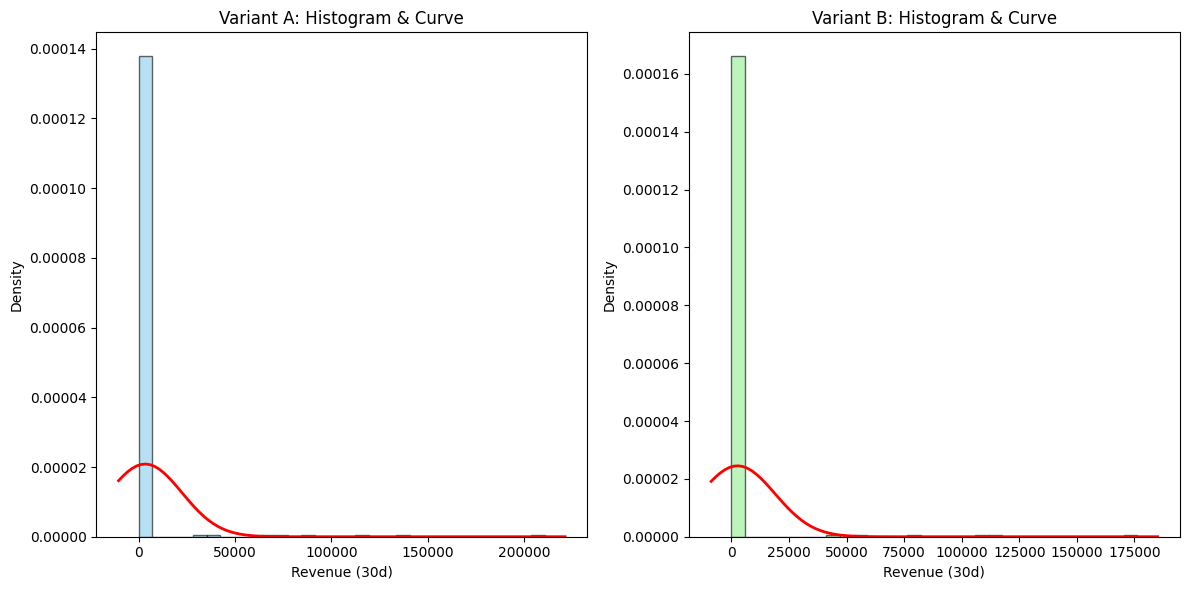

In [10]:
# Data untuk Variant A dan Variant B
data_a = df_a['revenue_30d']
data_b = df_b['revenue_30d']

# Plot untuk Variant A
plt.figure(figsize=(12, 6))

# Histogram untuk Variant A
plt.subplot(1, 2, 1)
plt.hist(data_a, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
mean_a, std_a = np.mean(data_a), np.std(data_a)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_a, std_a)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Variant A: Histogram & Curve')
plt.xlabel('Revenue (30d)')
plt.ylabel('Density')

# Plot untuk Variant B
plt.subplot(1, 2, 2)
plt.hist(data_b, bins=30, density=True, alpha=0.6, color='lightgreen', edgecolor='black')
mean_b, std_b = np.mean(data_b), np.std(data_b)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_b, std_b)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Variant B: Histogram & Curve')
plt.xlabel('Revenue (30d)')
plt.ylabel('Density')

# Tampilkan plot
plt.tight_layout()
plt.show()

### Cek Variansi

In [11]:
#Mengecheck tersebarnya data terdistribusi normal atau tidak
if shapiro_A.pvalue < 0.05 or shapiro_B.pvalue < 0.05:
    print("Salah satu varian tidak terdistribusi normal, maka cek variansi akan diabaikan")
else:
    print("Kedua varian terdistribusi normal, lanjutkan cek variansi")
    cek_variansi = stats.levene(df_a['revenue_30d'], df_b['revenue_30d'])
    # print("If p-value < 0.05 maka tidak homogen (equal variance)")
    print("Nilai p-value: {:.2f}".format(cek_variansi.pvalue))
    if cek_variansi.pvalue < 0.05:
        cek_variansi_status = "Data tidak homogen (equal variance), menggunakan Welch's t-test"
        print(cek_variansi_status)
        stud = stats.ttest_ind(df_a['revenue_30d'], df_b['revenue_30d'], equal_var=False)
    else:
        cek_variansi_status = "Data homogen (non equal variance), menggunakan t-test biasa"
        print(cek_variansi_status)
        stud = stats.ttest_ind(df_a['revenue_30d'], df_b['revenue_30d'], equal_var=True)

Salah satu varian tidak terdistribusi normal, maka cek variansi akan diabaikan


### Uji Statistik
- H0: varian A dan varian B tidak ada bedanya terhadap revenue_30d.
- H1: Varian B mampu meningkatkan order value dibanding varian A

In [12]:
if shapiro_A.pvalue > 0.05 and shapiro_B.pvalue > 0.05:
    #Mengecheck tersebarnya data terdistribusi normal atau tidak
    print("\nSemua variant data terdistribusi normal maka akan digunakan T-Test:\n")
    print("Test " + cek_variansi_status)

    if stud.pvalue < 0.05:
        print("Reject H0")
        h_status = 1
    else:
        print("Accept (Fail to reject) H0")
        h_status = 0
else:
    print("\nSalah satu variant data tidak terdistribusi normal maka akan digunakan Mann-Whitney U Test:\n")
    whitney = stats.mannwhitneyu(df_a['revenue_30d'], df_b['revenue_30d'])
    if whitney.pvalue < 0.05:
        print("Reject H0")
        h_status = 1
    else:
        print("Accept (Fail to reject) H0")
        h_status = 0
    print("Nilai p-value: {:.2f}".format(whitney.pvalue))


Salah satu variant data tidak terdistribusi normal maka akan digunakan Mann-Whitney U Test:

Accept (Fail to reject) H0
Nilai p-value: 0.40


## Uji Kenaikan Bisnis

In [13]:
if h_status == 1:
    print("\nt-test atau Mann-Whitney U Test memiliki status 'Reject H0' maka akan dilakukan perhitungan uplift sebagai uji kenaikan bisnis\n")

    mean_A = df_a['revenue_30d'].mean()
    mean_B = df_b['revenue_30d'].mean()

    uplift_abs = (mean_B - mean_A)
    uplift_perc = round((mean_B - mean_A)/mean_A*100,2)

    print("Uplift Absolut; ", uplift_abs)
    print("Uplift Percent; {}%".format(uplift_perc))
else:
    print("\nt-test atau Mann-Whitney U Test memiliki status 'Accept (Fail to reject) H0', maka uji kenaikan bisnis tidak dilakukan\n")


t-test atau Mann-Whitney U Test memiliki status 'Accept (Fail to reject) H0', maka uji kenaikan bisnis tidak dilakukan



In [14]:
if h_status == 1:
    print("\nt-test atau Mann-Whitney U Test memiliki status 'Reject H0' maka akan dilakukan perhitungan uplift sebagai uji kenaikan bisnis\n")

    mean_A = df_a['revenue_30d'].median()
    mean_B = df_b['revenue_30d'].median()

    uplift_abs = (mean_B - mean_A)
    uplift_perc = round((mean_B - mean_A)/mean_A*100,2)

    print("Uplift Absolut; ", uplift_abs)
    print("Uplift Percent; {}%".format(uplift_perc))
else:
    print("\nt-test atau Mann-Whitney U Test memiliki status 'Accept (Fail to reject) H0', maka uji kenaikan bisnis tidak dilakukan\n")


t-test atau Mann-Whitney U Test memiliki status 'Accept (Fail to reject) H0', maka uji kenaikan bisnis tidak dilakukan



In [ ]:
''' 
Kesimpulan dari a/b testing ini menunjukkan bahwa: 
Tidak ada perbedaan signifikan antara varian A dan B dalam hal revenue_30d (pendapatan 30 hari).
'''